In [ ]:
# !pip install pillow --upgrade
# !pip install python-igraph
# !pip install graspologic
# !pip install networkx
# !pip install matplotlib
# !pip install torch_geometric
# !pip install torch-sparse -f https://pytorch-geometric.com/whl/torch-1.7.0+${CUDA}.html
# !pip install torch-scatter==latest+cu101 torch-sparse==latest+cu101 -f https://pytorch-geometric.com/whl/torch-1.7.0.html

In [ ]:
!cp drive/MyDrive/code/utils.py .
!cp drive/MyDrive/code/dataset.py .
!cp drive/MyDrive/code/model.py .
!cp drive/MyDrive/code/classifier.py .
# !cp drive/MyDrive/code/utils.py . 

In [1]:
from utils import *
from dataset import *
from model import *
from classifier import *

In [2]:
if torch.cuda.is_available():  
  dev = "cuda:0" 
else:  
  dev = "cpu"  
device = torch.device(dev)  

GraphicalLassoCV(alphas=[0.001, 0.002])
GraphicalLassoCV(alphas=[0.001, 0.002])
(42.094001669753894, 41.202594397339865)
6.255673573719985
49
49
49
49
50
50
50
50


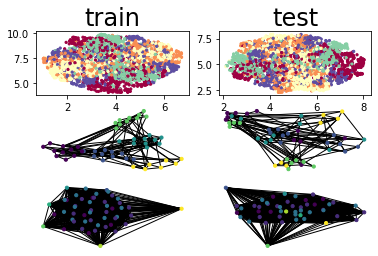

[3, 4, 1, 4, 4, 4, 1, 3, 2, 0, 0, 0, 2, 1, 2, 4, 2, 4, 4, 3, 2, 2, 0, 2, 4, 1, 3, 0, 2, 4, 1, 1, 1, 3, 1, 1, 4, 1, 3, 2, 2, 0, 4, 4, 2, 2, 0, 0, 3, 3, 1, 3, 3, 4, 0, 0, 2, 0, 2, 0, 1, 3, 2, 3, 4, 4, 3, 0, 2, 1, 1, 2, 0, 0, 2, 4, 1, 2, 2, 2, 0, 3, 4, 1, 2, 1, 0, 4, 0, 3, 3, 1, 2, 3, 0, 2, 4, 1, 2, 2, 4, 0, 4, 3, 4, 3, 1, 0, 4, 0, 0, 1, 4, 3, 2, 4, 4, 3, 0, 4, 4, 2, 0, 4, 0, 2, 0, 2, 4, 4, 3, 2, 1, 1, 3, 3, 0, 0, 0, 0, 0, 1, 3, 2, 2, 0, 0, 2, 3, 4, 3, 4, 2, 3, 2, 1, 3, 2, 4, 1, 2, 0, 1, 3, 1, 3, 4, 2, 4, 1, 2, 0, 3, 3, 1, 1, 4, 2, 0, 1, 0, 2, 2, 3, 4, 1, 1, 4, 1, 0, 1, 0, 2, 3, 1, 4, 2, 3, 2, 3, 1, 4, 1, 2, 2, 4, 2, 1, 3, 4, 3, 0, 3, 4, 0, 1, 3, 4, 1, 1, 4, 0, 2, 0, 0, 2, 4, 1, 4, 2, 1, 3, 0, 4, 0, 1, 3, 1, 1, 4, 4, 2, 0, 0, 1, 2, 2, 4, 0, 4, 2, 4, 4, 0, 1, 3, 4, 0, 0, 3, 0, 4, 0, 1, 1, 0, 3, 4, 3, 0, 3, 3, 1, 2, 4, 0, 2, 3, 2, 0, 0, 2, 4, 3, 2, 0, 2, 1, 4, 2, 2, 2, 1, 2, 4, 1, 2, 1, 3, 0, 4, 4, 3, 4, 4, 4, 2, 3, 0, 1, 1, 4, 3, 3, 0, 1, 4, 1, 1, 3, 4, 4, 2, 2, 2, 3, 3, 4, 1, 3, 2, 3, 1, 

In [3]:
dataset = Dataset(tag='EXP1')

dataset.create_syn(n_classes = 5, 
                   n_obs_train = 500, 
                   n_obs_test= 1000, 
                   n_features=50,
                   n_char_features = 6, 
                   signal =[2, 2], 
                   diff_coef=[.4, .4], 
                   noise = [.4, .4], 
                   n_communities = 5,
                   probs = [0.9, 0.1], 
                   n_iter=1, 
                   model ='ER',
                   syn_method="oppneighbors")

dataset.create_graph(alphas=[0.001, 0.002])

print(dataset.score_graphs())

print(dataset.comp_test())

plt.subplot(321)
plot_lowDim(dataset.X_train, dataset.y_train, title='train')
plt.subplot(322)
plot_lowDim(dataset.X_train, dataset.y_train, title ='test')
plt.subplot(323)
comm = draw_graph(dataset.A_train)
plt.subplot(324)
_ = draw_graph(dataset.A_test, comm)
plt.subplot(325)
comm = draw_graph(dataset.Ah_train)
plt.subplot(326)
_ = draw_graph(dataset.Ah_test, comm)
plt.show()

train_dataloader = dataset._dataloader('train',use_true_graph=True,batch_size=16)
test_dataloader  = dataset._dataloader('test',use_true_graph=True,batch_size=16)

In [10]:
clf = Classifier(n_features=50,
        n_classes=5,
        n_hidden_GNN=[5],
        n_hidden_FC=[], #10
        dropout_FC=0.1, 
        K=1,
        classifier='GraphSAGE', 
        lr=.001, 
        momentum=.9,
        log_dir="runs/GNN")

clf.fit(train_dataloader, epochs = 30, test_dataloader=test_dataloader,verbose=True)

[1] loss: 0.732
[4] loss: 0.332
[7] loss: 0.302
[10] loss: 0.286
[13] loss: 0.273
[16] loss: 0.249
[19] loss: 0.248
[22] loss: 0.250
[25] loss: 0.250
[28] loss: 0.243


In [11]:
_ = clf.eval(train_dataloader, verbose=True)
_ = clf.eval(test_dataloader, verbose=True)

Accuracy: 0.954
Confusion Matrix:n [[491   1   2   6   0]
 [  0 466  16  10   8]
 [  2   5 488   3   2]
 [  3   3   3 491   0]
 [ 14  16  11  11 448]]
Precision: 0.954
Recall: 0.954
f1_score: 0.953
Accuracy: 0.888
Confusion Matrix:n [[926  11  18  29  16]
 [ 18 861  52  43  26]
 [ 22  39 902  23  14]
 [ 31  16  11 933   9]
 [ 60  47  50  23 820]]
Precision: 0.890
Recall: 0.888
f1_score: 0.888


In [12]:
clf = Classifier(n_features=50,
        n_classes=5,
        n_hidden_GNN=[],
        n_hidden_FC=[20],
        dropout_FC=0.1, 
        K=1,
        classifier='MLP', 
        lr=.001, 
        momentum=.9,
        log_dir="runs/MLP")
clf.fit(train_dataloader, epochs = 30, test_dataloader=test_dataloader,verbose=True)
_ = clf.eval(train_dataloader, verbose=True)
_ = clf.eval(test_dataloader, verbose=True)

[1] loss: 1.411
[4] loss: 0.689
[7] loss: 0.595
[10] loss: 0.576
[13] loss: 0.522
[16] loss: 0.544
[19] loss: 0.504
[22] loss: 0.493
[25] loss: 0.499
[28] loss: 0.497
Accuracy: 0.922
Confusion Matrix:n [[483   4   3   6   4]
 [  3 459  14   9  15]
 [  0   4 484   5   7]
 [  6  24   9 457   4]
 [ 23  26  15  13 423]]
Precision: 0.923
Recall: 0.922
f1_score: 0.922
Accuracy: 0.796
Confusion Matrix:n [[866  31  27  40  36]
 [ 15 807  64  64  50]
 [ 21  49 871  23  36]
 [ 90  81  52 745  32]
 [ 94 116  54  44 692]]
Precision: 0.798
Recall: 0.796
f1_score: 0.795
